In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras 
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.layers import Dense,Activation,Flatten,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from keras.models import Sequential
import cv2
import os

Using TensorFlow backend.


In [3]:
train_dir='data/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir='data/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

unique labels= ['A' 'B' 'C' 'D' 'del' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q'
 'R' 'S' 'space' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


<Figure size 720x720 with 0 Axes>

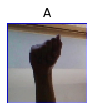

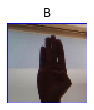

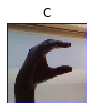

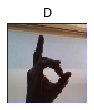

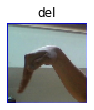

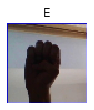

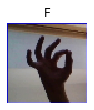

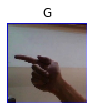

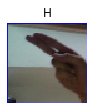

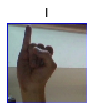

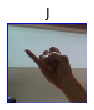

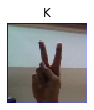

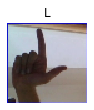

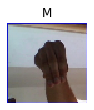

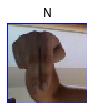

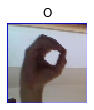

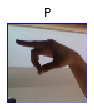

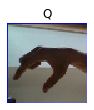

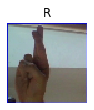

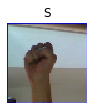

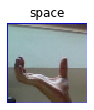

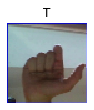

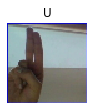

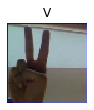

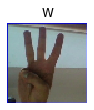

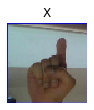

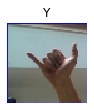

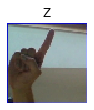

In [4]:
def load_unique():
    images=[]
    labels=[]
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath=train_dir + '/' + folder + '/' + file
            img=cv2.resize(cv2.imread(filepath),(64,64))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(folder)
            break
    images=np.array(images)
    labels=np.array(labels)
    return images,labels

images,labels= load_unique()
print("unique labels=",labels)

fig=plt.figure(figsize=(10,10))
def plot_images(fig,image,label,index):
    fig=plt.figure(figsize=(10,10))
    fig.add_subplot(5,6,index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return
image_index=0
for i in range(1,29):
    plot_images(fig,images[image_index],labels[image_index],i)
    image_index+=1
    plt.show()

In [5]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27}

In [6]:
def load_data():
    images=[]
    labels=[]
    size=64,64
    print("loading data from")
    for folder in os.listdir(train_dir):
        print(folder,end="|")
        for image in os.listdir(train_dir + '/' + folder):
            temp_img=cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img=cv2.resize(temp_img,size)
            images.append(temp_img)
            if folder== 'A':
                labels.append(labels_dict['A'])
            elif folder== 'B':
                labels.append(labels_dict['B'])
            elif folder== 'C':
                labels.append(labels_dict['C'])
            elif folder== 'D':
                labels.append(labels_dict['D'])
            elif folder== 'E':
                labels.append(labels_dict['E'])
            elif folder== 'F':
                labels.append(labels_dict['F'])
            elif folder== 'G':
                labels.append(labels_dict['G'])
            elif folder== 'H':
                labels.append(labels_dict['H'])
            elif folder== 'I':
                labels.append(labels_dict['I'])
            elif folder== 'J':
                labels.append(labels_dict['J'])
            elif folder== 'K':
                labels.append(labels_dict['K'])
            elif folder== 'L':
                labels.append(labels_dict['L'])
            elif folder== 'M':
                labels.append(labels_dict['M'])
            elif folder== 'N':
                labels.append(labels_dict['N'])
            elif folder== 'O':
                labels.append(labels_dict['O'])
            elif folder== 'P':
                labels.append(labels_dict['P'])
            elif folder== 'Q':
                labels.append(labels_dict['Q'])
            elif folder== 'R':
                labels.append(labels_dict['R'])
            elif folder== 'S':
                labels.append(labels_dict['S'])
            elif folder== 'T':
                labels.append(labels_dict['T'])
            elif folder== 'U':
                labels.append(labels_dict['U'])
            elif folder== 'V':
                labels.append(labels_dict['V'])
            elif folder== 'W':
                labels.append(labels_dict['W'])
            elif folder== 'X':
                labels.append(labels_dict['X'])
            elif folder== 'Y':
                labels.append(labels_dict['Y'])
            elif folder== 'Z':
                labels.append(labels_dict['Z'])
            elif folder== 'space':
                labels.append(labels_dict['space'])
            elif folder== 'del':
                labels.append(labels_dict['del'])
                
    
    labels=keras.utils.to_categorical(labels)
    
    X_train,X_test,Y_train,Y_test=train_test_split(images,labels,test_size=0.1)
    
    X_train=np.array(X_train,dtype=np.float32)
    X_test=np.array(X_test,dtype=np.float32)
    
    print()
    print('Loaded',len(X_train),'images for training','training data shape=',X_train.shape)
    print('Loaded',len(X_test),'images for testing','testing data shape=',X_test.shape)

    return X_train,X_test,Y_train,Y_test

In [7]:
X_train,X_test,Y_train,Y_test=load_data()

loading data from
A|B|C|D|del|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|space|T|U|V|W|X|Y|Z|
Loaded 63000 images for training training data shape= (63000, 64, 64, 3)
Loaded 7000 images for testing testing data shape= (7000, 64, 64, 3)


In [8]:
    model=Sequential()
    model.add(Conv2D(64,activation='relu',kernel_size=3,input_shape=(64,64,3),padding='same'))
    model.add(Conv2D(64,activation='relu',kernel_size=3,padding='same'))
    model.add(MaxPooling2D(pool_size=(4,4)))
    model.add(Dropout(0.5))
    model.add(Conv2D(128,activation='relu',kernel_size=3,padding='same'))
    model.add(Conv2D(128,activation='relu',kernel_size=3,padding='same'))
    model.add(MaxPooling2D(pool_size=(4,4)))
    model.add(Dropout(0.5)) 
    model.add(Conv2D(256,activation='relu',kernel_size=3,padding='same')) 
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(28,activation='softmax'))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    model.summary()

W1222 23:48:45.527530 17992 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1222 23:48:48.117616 17992 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1222 23:48:48.221122 17992 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1222 23:48:48.394948 17992 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.m

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
__________

In [9]:
model.fit(X_train,Y_train,batch_size=64,epochs=15)

Epoch 1/15
63000/63000 [==============================] - 475s 8ms/step - loss: 0.1003 - acc: 0.9705
Epoch 2/15
63000/63000 [==============================] - 283s 4ms/step - loss: 0.0258 - acc: 0.9901
Epoch 3/15
63000/63000 [==============================] - 284s 5ms/step - loss: 0.0124 - acc: 0.9953
Epoch 4/15
63000/63000 [==============================] - 284s 5ms/step - loss: 0.0090 - acc: 0.9968
Epoch 5/15
63000/63000 [==============================] - 288s 5ms/step - loss: 0.0067 - acc: 0.9976
Epoch 6/15
63000/63000 [==============================] - 288s 5ms/step - loss: 0.0060 - acc: 0.9979
Epoch 7/15
63000/63000 [==============================] - 287s 5ms/step - loss: 0.0053 - acc: 0.9982
Epoch 8/15
63000/63000 [==============================] - 284s 5ms/step - loss: 0.0050 - acc: 0.9983
Epoch 9/15
63000/63000 [==============================] - 283s 4ms/step - loss: 0.0050 - acc: 0.9983
Epoch 10/15
63000/63000 [==============================] - 284s 5ms/step - loss: 0.0042 - a

In [10]:
model.evaluate(X_test,Y_test)

7000/7000 [==============================] - 46s 7ms/step


[0.000282851695678281, 0.9999183676583426]

In [11]:
def load_test_data():
    images_for_plot=[]
    labels_for_plot=[]
    size=64,64 
    for image in os.listdir(test_dir):
        temp=cv2.imread(test_dir +'/'+image)
        temp=cv2.resize(temp,size)
        images_for_plot.append(temp)
        labels_for_plot.append(image)
            
    images_for_plot=np.array(images_for_plot)
    labels_for_plot=np.array(labels_for_plot)
    return images_for_plot,labels_for_plot

test_images,test_labels=load_test_data()
print(test_labels)

['A_test.jpg' 'B_test.jpg' 'C_test.jpg' 'del_test.jpg' 'D_test.jpg'
 'E_test.jpg' 'F_test.jpg' 'G_test.jpg' 'H_test.jpg' 'I_test.jpg'
 'J_test.jpg' 'K_test.jpg' 'L_test.jpg' 'M_test.jpg' 'N_test.jpg'
 'O_test.jpg' 'P_test.jpg' 'Q_test.jpg' 'R_test.jpg' 'space_test.jpg'
 'S_test.jpg' 'T_test.jpg' 'U_test.jpg' 'V_test.jpg' 'W_test.jpg'
 'X_test.jpg' 'Y_test.jpg' 'Z_test.jpg']


In [12]:
def give_predictions(test_data):
    predictions=[]
    for image in test_data:
        image=image.reshape(1,64,64,3)
        pred=model.predict_classes(image)
        predictions.append(pred[0])
    return predictions    
    
predictions=give_predictions(test_images)
print(predictions)

[18, 1, 2, 27, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 26, 18, 19, 20, 21, 22, 23, 24, 25]


In [13]:
def get_labels_for_plot(predictions):
    predictions_labels=[]
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i]==labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels
    
predictions_labels_plot=get_labels_for_plot(predictions) 
print(predictions_labels_plot)

['S', 'B', 'C', 'del', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'space', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


<Figure size 720x720 with 0 Axes>

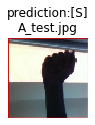

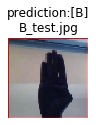

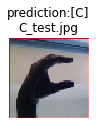

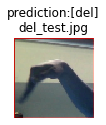

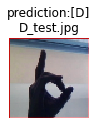

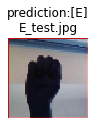

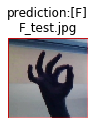

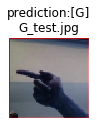

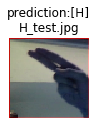

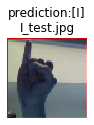

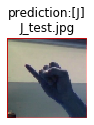

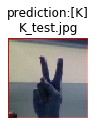

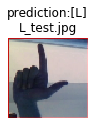

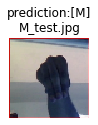

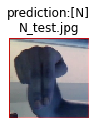

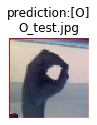

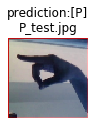

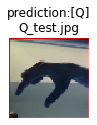

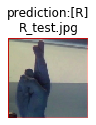

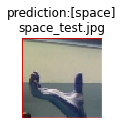

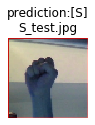

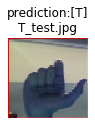

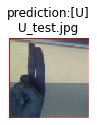

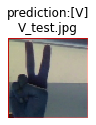

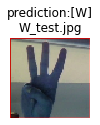

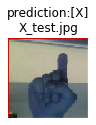

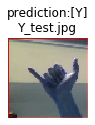

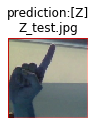

In [14]:
predfig=plt.figure(figsize=(10,10))
def plot_img(predfig,image,label,prediction_label,index):
    predfig=plt.figure(figsize=(10,10))
    predfig.add_subplot(5,6,index)
    plt.axis('off')
    plt.imshow(image)
    title_img="prediction:["+str(prediction_label)+"]"+"\n"+label
    plt.title(title_img)
    return

image_index=0
for i in range(1,29):
    plot_img(predfig,test_images[image_index],test_labels[image_index],predictions_labels_plot[image_index],i)
    image_index+=1
    plt.show()
    

In [15]:
model.save('hand_data.csv')